                        PREDICTING AIR QUALITY INDEX USING AIR POLLUTANT DATA.

objective is to develop a model to predict AQI based on air pollutant concentrations.

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('city_day.csv')

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


The dataset contain following features:
City:This feature contain different cities in India.

Date:The date of data collection from 2015 to 2020

PM2.5,PM10:Particulate matter with diameters less than 2.5 micrometers and 10 micrometers respectively.These particles can cause various health problems.

NO(Nitric Oxide):A gas that can irritate lungs and cause respiratory infections.

NO2(Nitrogen Dioxide):Pollutant from vehicle emissions and industrial processes.

NOx(Nitogen Oxides):A group of gases that includes NO and NO2.They play a significant role in atmospheric reactions that produce ozone.

NH3(Ammonia):Found in agricultural areas due to use of fertilizers.

CO(Carbon Monoxide):Hrmful for human health.

SO2(Sulphor Dioxide):Can cause respiratory problems.

O3(Ozone):High level can cause respiratory issues.

Benzene,Toluene and Xylene:(Volatile organic compounds)

AQI:The Air Quality Index

AQI_Bucket:Ctegory of AQI

In India AQI is calculated according to Central Pollution Control Board.The AQI is calculated using concentration of the pollutants.Each pollutant's concentration is converted to AQI value using sepicic formulas and breakpoints that is predefined by EPA(Environmental Protection Agency).The highest AQI value among the pollutants determine the AQI for the day.
The overall AQI is categorized as:
0-50:good
51-100:moderate
101-150:unhealthy for sensitive groups
151-200:unhealthy
201-300:very unhealthy
301-500:hazardous

In [5]:
df.shape

(29531, 16)

There are 29531 rows and 16 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


City,date are objects(strings) and AQI_Bucket is categorical.The measurement of pollutants are in numerical values.There are missing values.

In [7]:
df['City'].value_counts()

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64

In [8]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


High PM10 values: The high mean and maximum values of PM10 suggest that particulate matter with a diameter of 10 micro metere is a significant pollutant.
NOx and NO2: The high mean and maximum values of NOx and NO2 indicate that nitrogen oxides are a significant contributor to air pollution.
AQI: The high mean and maximum values of AQI suggest that the overall air quality is poor, with values exceeding 200 in some cases.
Volatile Organic Compounds (VOCs): The relatively high mean and maximum values of Benzene, Toluene, and Xylene indicate that VOCs are present in the air, which can have adverse health effects.
CO and NH3: The relatively low mean and maximum values of CO and NH3 suggest that these pollutants are not as significant a concern in this area.

In [9]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

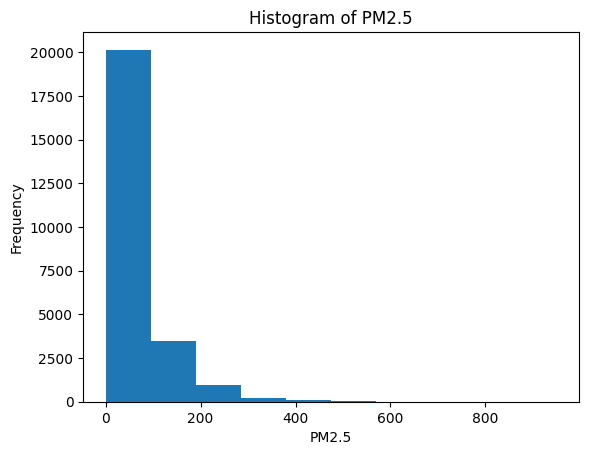

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['PM2.5'], bins=10)
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5')
plt.show()

The majority of datapoints are at 0-100 and the data is right skewed that is more PM2 values are lower.A few data points are between 200-300.There are lesser situations where concentration of PM2 is greater than 300.

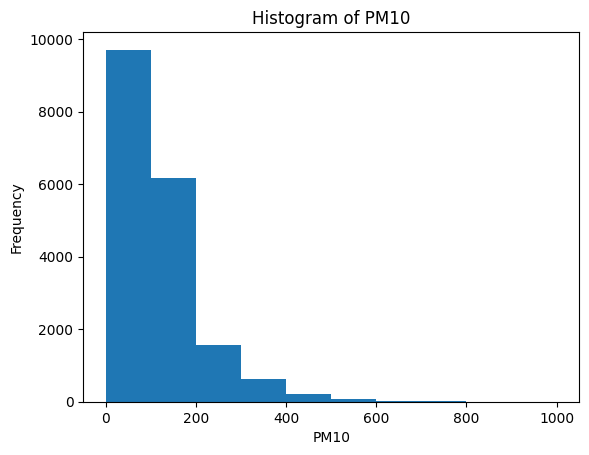

In [11]:
plt.hist(df['PM10'], bins=10)
plt.xlabel('PM10')
plt.ylabel('Frequency')
plt.title('Histogram of PM10')
plt.show()

The majority of datapoints are at 0-40 and the data is right skewed that is more NO values are lower.There are lesser situations where concentration of NO is greater than 75.

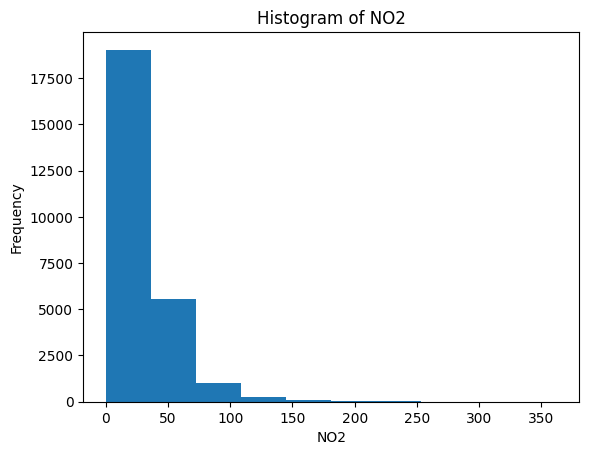

In [12]:
plt.hist(df['NO2'], bins=10)
plt.xlabel('NO2')
plt.ylabel('Frequency')
plt.title('Histogram of NO2')
plt.show()

The majority of datapoints are at 0-60 and the data is right skewed that is more NO2 values are lower.There are lesser situations where concentration of PM2 is greater than 100.The concentration of NO2 is comparatively lower

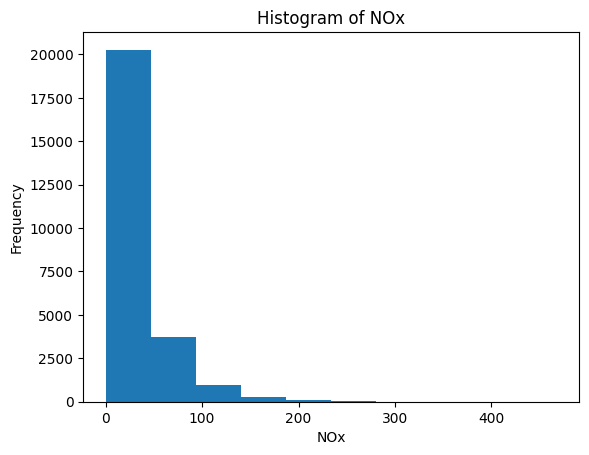

In [13]:
plt.hist(df['NOx'], bins=10)
plt.xlabel('NOx')
plt.ylabel('Frequency')
plt.title('Histogram of NOx')
plt.show()

The majority data points are between 0-50.Right skewed.

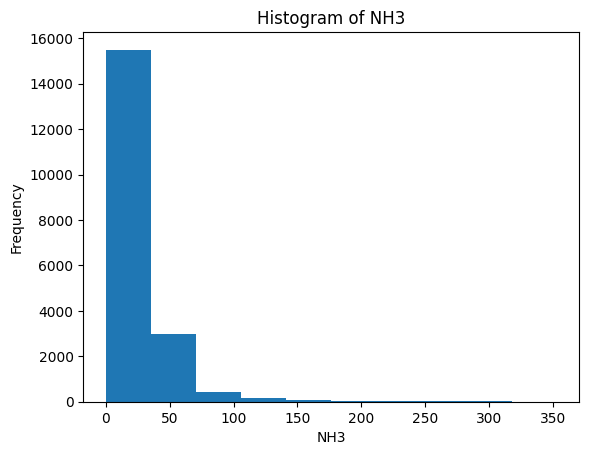

In [14]:
plt.hist(df['NH3'], bins=10)
plt.xlabel('NH3')
plt.ylabel('Frequency')
plt.title('Histogram of NH3')
plt.show()

Most of the datapoints are at 0-40.The concentration of NH3 is small in major areas

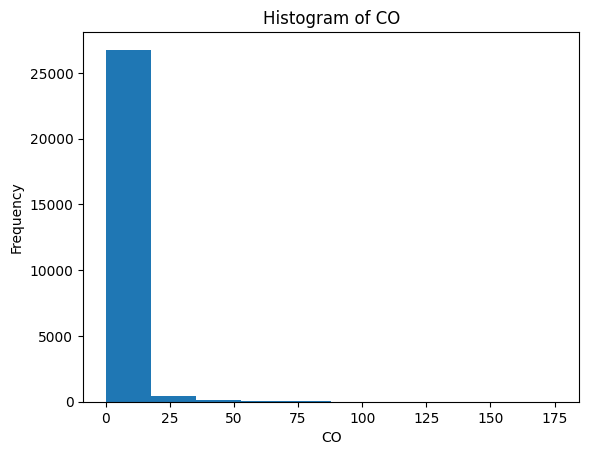

In [15]:
plt.hist(df['CO'], bins=10)
plt.xlabel('CO')
plt.ylabel('Frequency')
plt.title('Histogram of CO')
plt.show()

The data points are at 0-20 majority.There are very small data points above 20

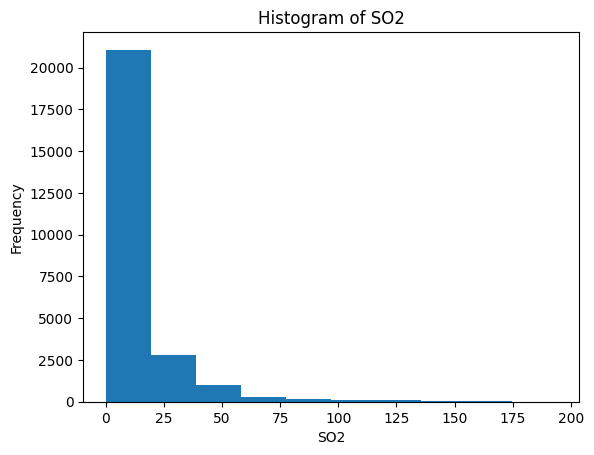

In [16]:
plt.hist(df['SO2'], bins=10)
plt.xlabel('SO2')
plt.ylabel('Frequency')
plt.title('Histogram of SO2')
plt.show()

The data points are at 0-20.

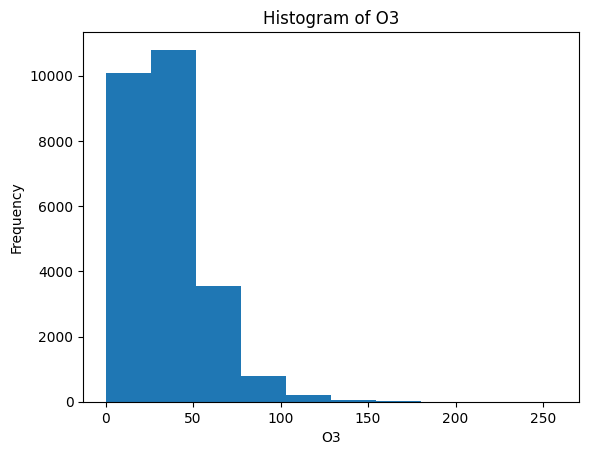

In [17]:
plt.hist(df['O3'], bins=10)
plt.xlabel('O3')
plt.ylabel('Frequency')
plt.title('Histogram of O3')
plt.show()

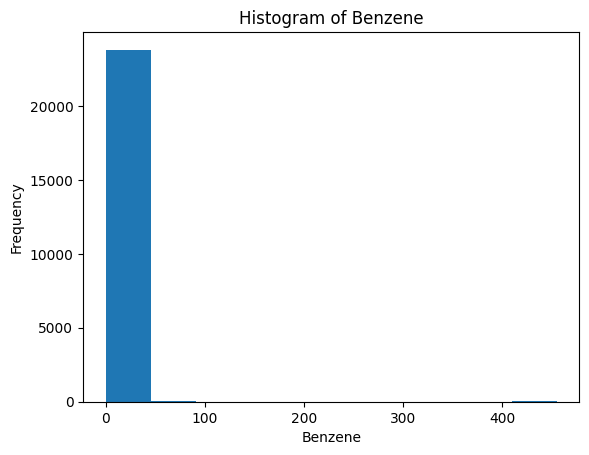

In [18]:
plt.hist(df['Benzene'], bins=10)
plt.xlabel('Benzene')
plt.ylabel('Frequency')
plt.title('Histogram of Benzene')
plt.show()

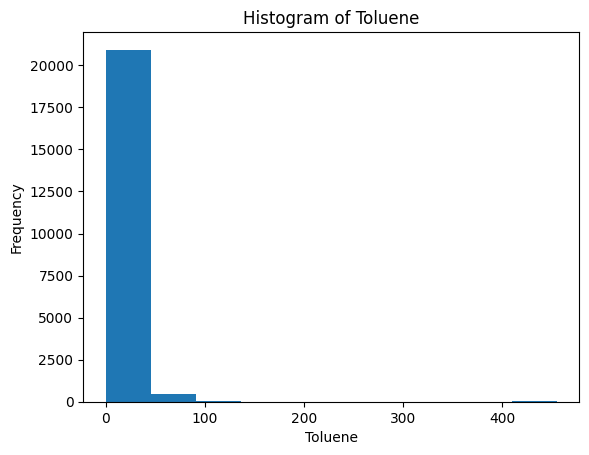

In [19]:
plt.hist(df['Toluene'], bins=10)
plt.xlabel('Toluene')
plt.ylabel('Frequency')
plt.title('Histogram of Toluene')
plt.show()

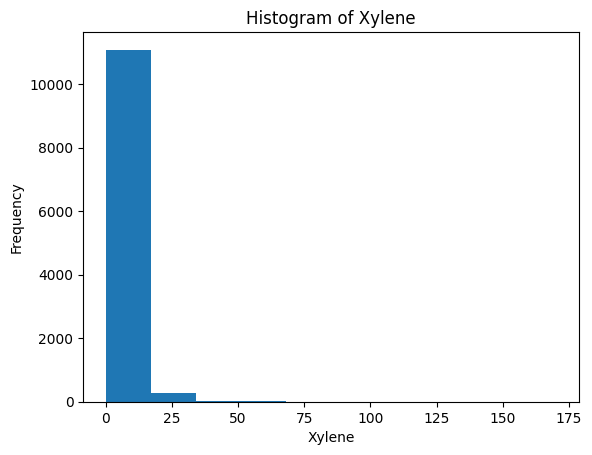

In [20]:
plt.hist(df['Xylene'], bins=10)
plt.xlabel('Xylene')
plt.ylabel('Frequency')
plt.title('Histogram of Xylene')
plt.show()

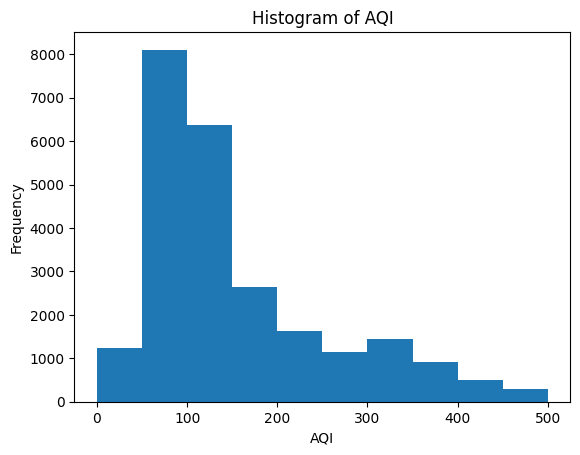

In [21]:
bins = [0, 50, 100, 150, 200, 250, 300,350,400,450,500]
plt.hist(df['AQI'], bins=bins)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Histogram of AQI')
plt.show()

most of the AQI values are in between 50 and 150.Most of the AQI values are lower.

In [22]:
import seaborn as sns

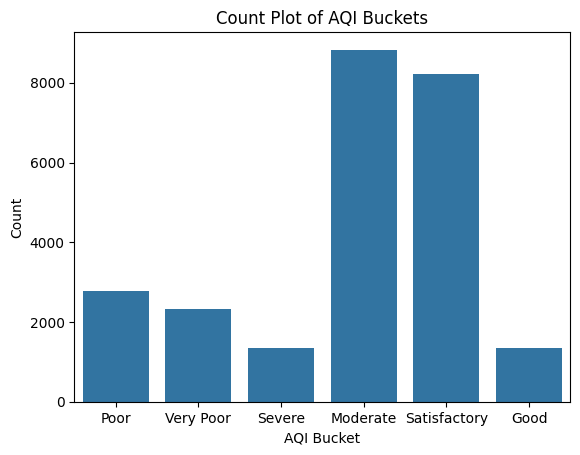

In [23]:
sns.countplot(x=df['AQI_Bucket'])
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.title('Count Plot of AQI Buckets')
plt.show()

<Axes: xlabel='PM2.5'>

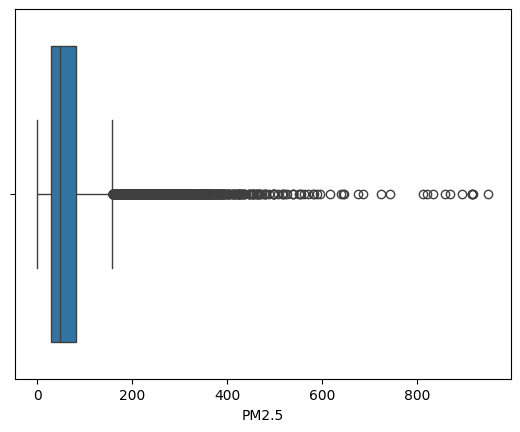

In [24]:
sns.boxplot(x=df['PM2.5'])

The box plot shows a highly right skewed distribution of PM2.5 values. The median is around 80. There are a significant number of outliers, with some values reaching over 900. This indicates that there are some days with very high levels of PM2.5, while most days have relatively lower levels.

In [25]:
import seaborn as sns

<Axes: xlabel='PM10'>

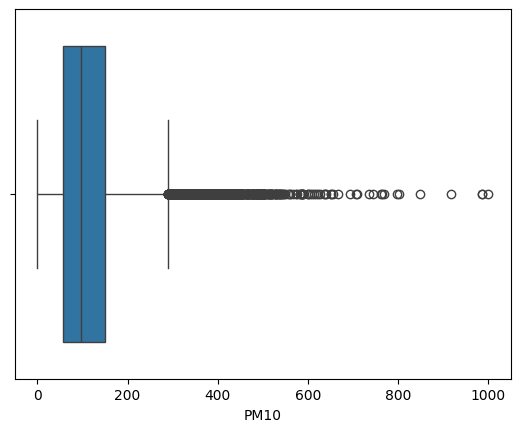

In [26]:
sns.boxplot(x=df['PM10'])

<Axes: xlabel='NO'>

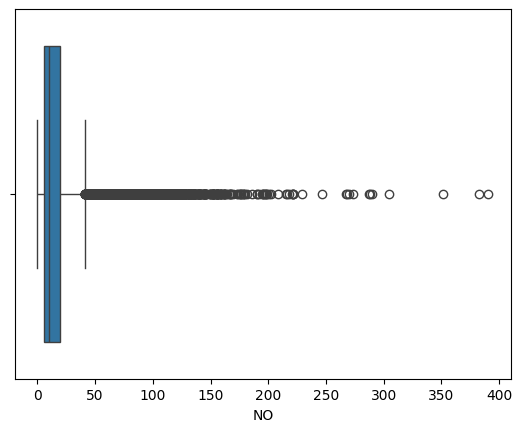

In [27]:
sns.boxplot(x=df['NO'])

<Axes: xlabel='NO2'>

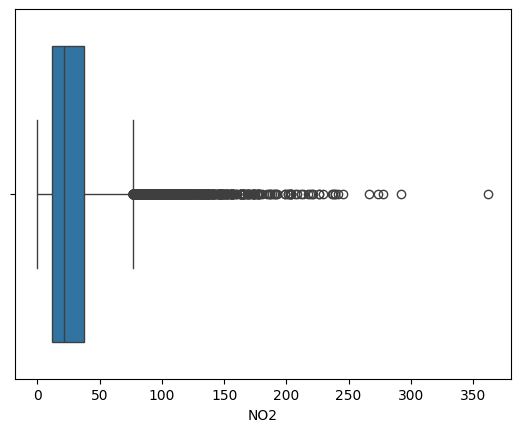

In [28]:
sns.boxplot(x=df['NO2'])

<Axes: xlabel='NOx'>

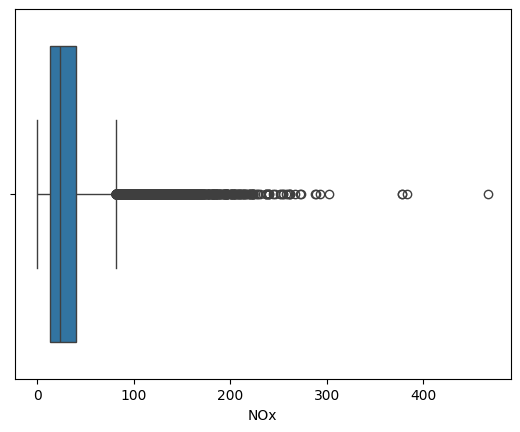

In [29]:
sns.boxplot(x=df['NOx'])

<Axes: xlabel='SO2'>

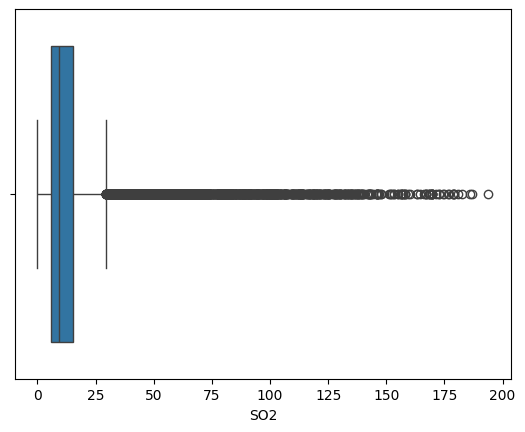

In [30]:
sns.boxplot(x=df['SO2'])

<Axes: xlabel='CO'>

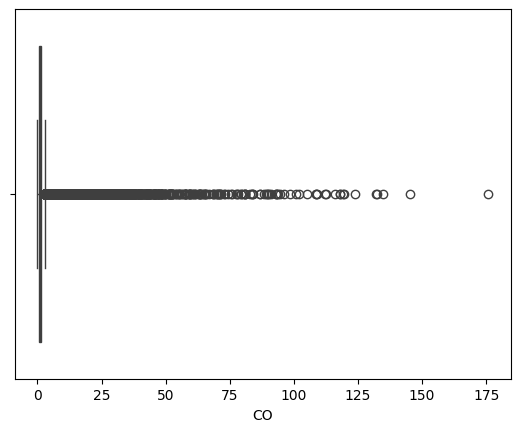

In [31]:
sns.boxplot(x=df['CO'])

<Axes: xlabel='NH3'>

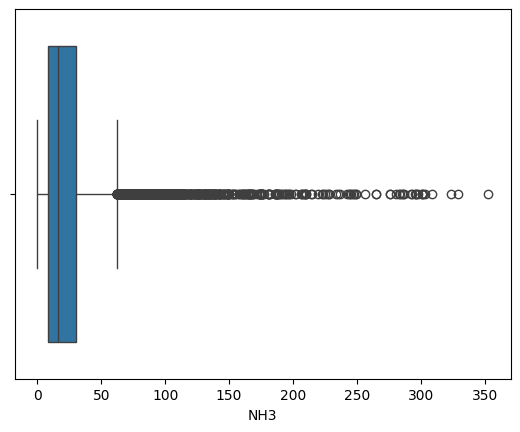

In [32]:
sns.boxplot(x=df['NH3'])

<Axes: xlabel='O3'>

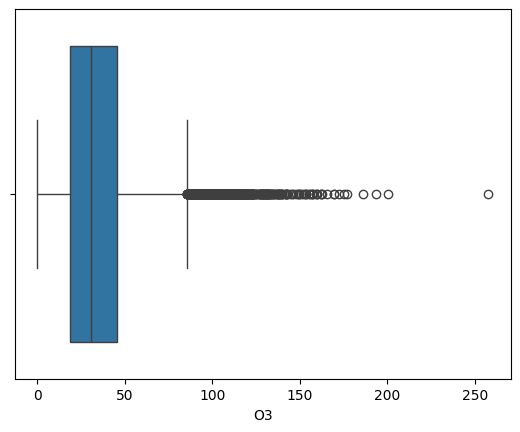

In [33]:
sns.boxplot(x=df['O3'])

<Axes: xlabel='Benzene'>

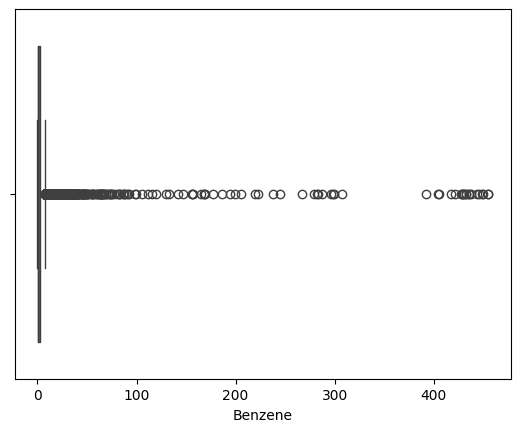

In [34]:
sns.boxplot(x=df['Benzene'])

<Axes: xlabel='Toluene'>

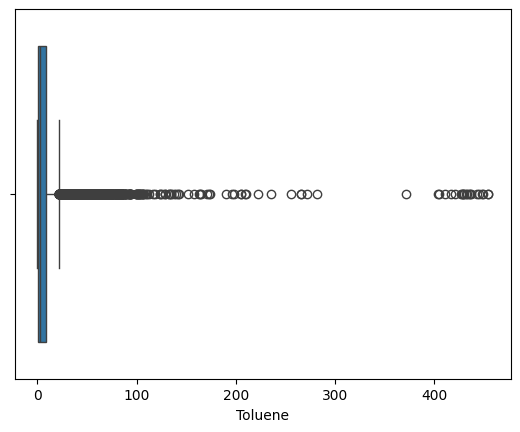

In [35]:
sns.boxplot(x=df['Toluene'])

<Axes: xlabel='Xylene'>

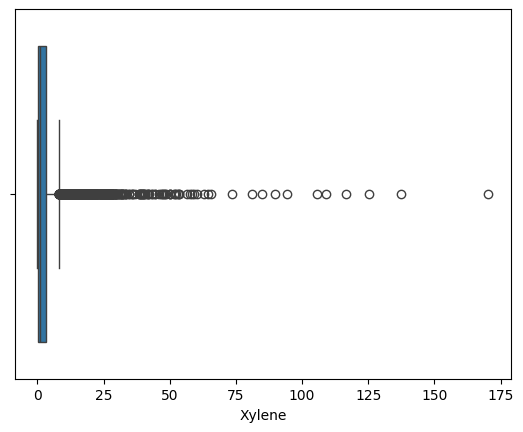

In [36]:
sns.boxplot(x=df['Xylene'])

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

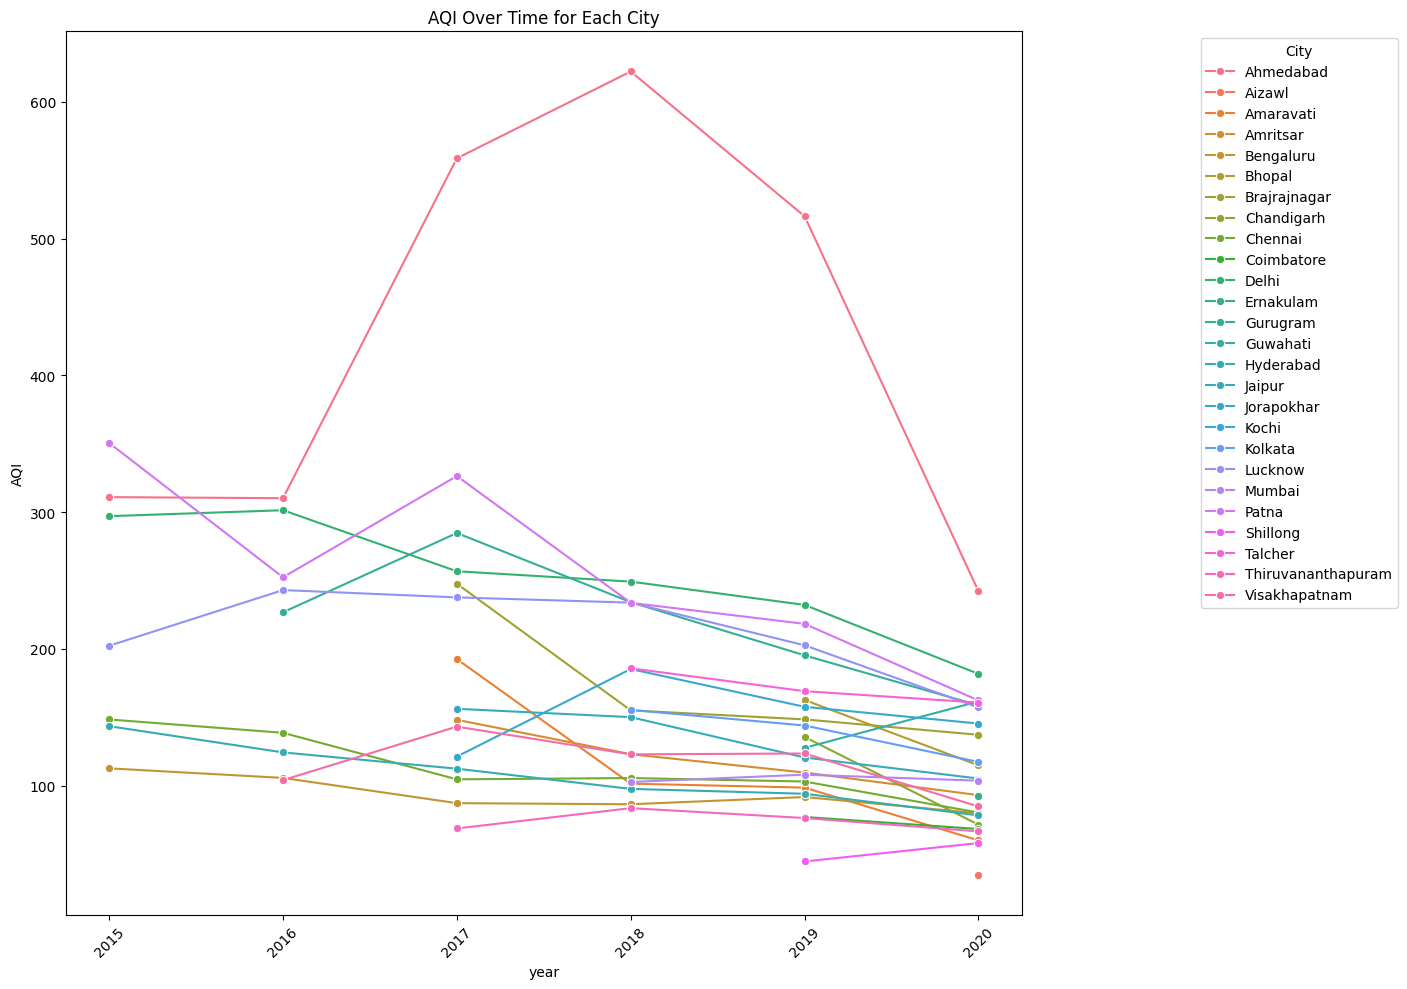

In [38]:
df['year']=df['Date'].dt.year
yearly_data = df.groupby(['year', 'City'], as_index=False)['AQI'].mean()
plt.figure(figsize=(15, 10))
palette = sns.color_palette("husl", len(yearly_data['City'].unique()))
sns.lineplot(data=df, x='year', y='AQI', hue='City', marker='o',palette=palette,errorbar=None)

plt.title('AQI Over Time for Each City')
plt.xlabel('year')
plt.ylabel('AQI')
plt.legend(title='City', bbox_to_anchor=(1.4, 1), loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There seems to be a spike in AQI in 2017 for many of the cities.

<ipython-input-39-2654e6baabb1>:16: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(min(unique_years), max(unique_years))
<ipython-input-39-2654e6baabb1>:16: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(min(unique_years), max(unique_years))
<ipython-input-39-2654e6baabb1>:16: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(min(unique_years), max(unique_years))
<ipython-input-39-2654e6baabb1>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


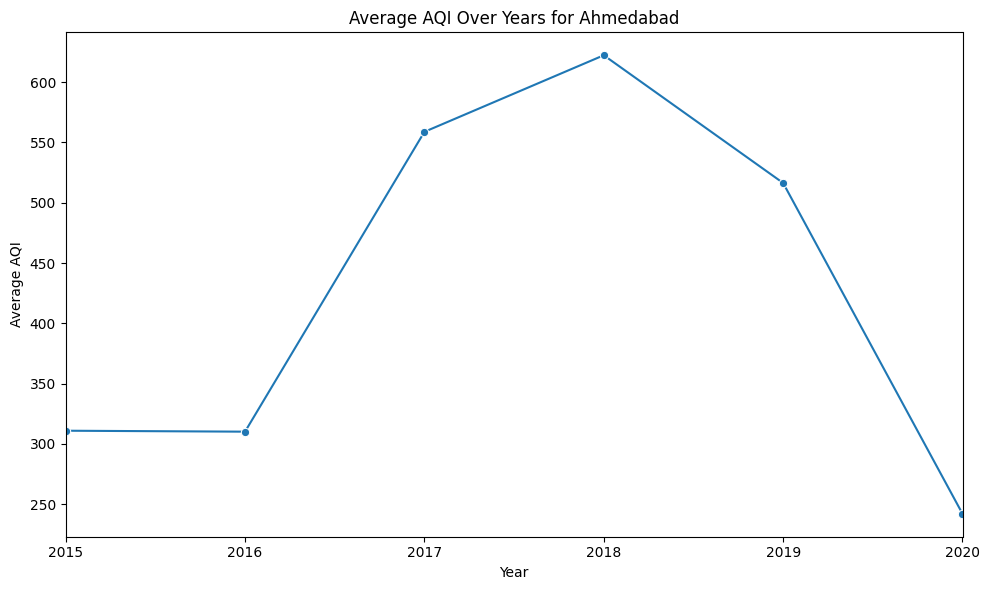

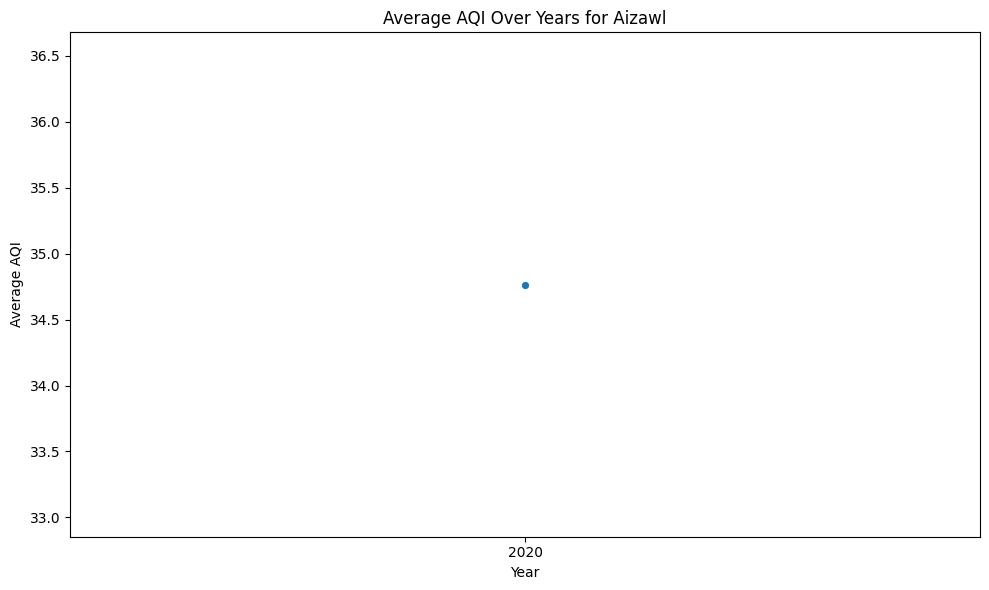

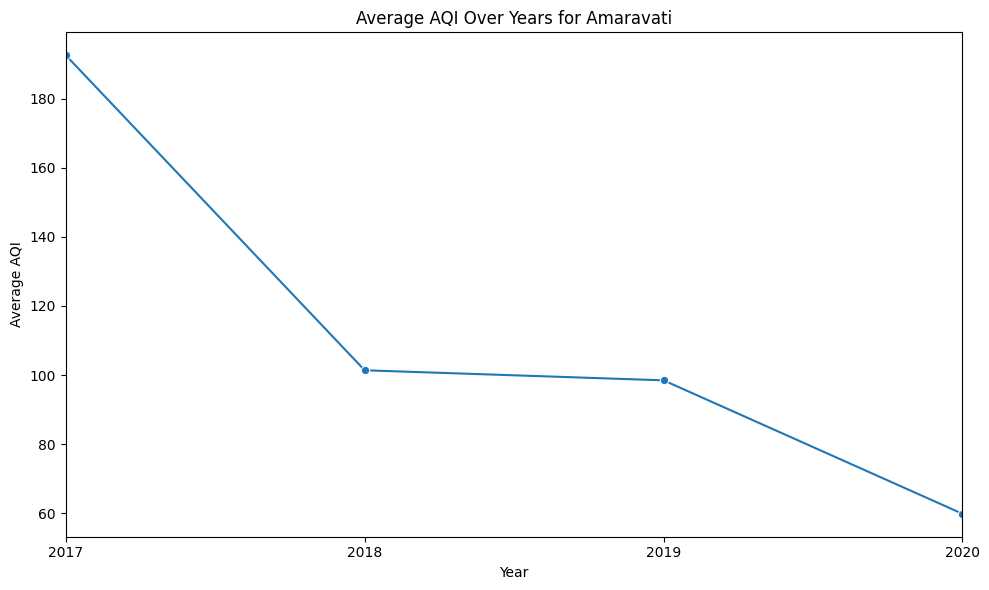

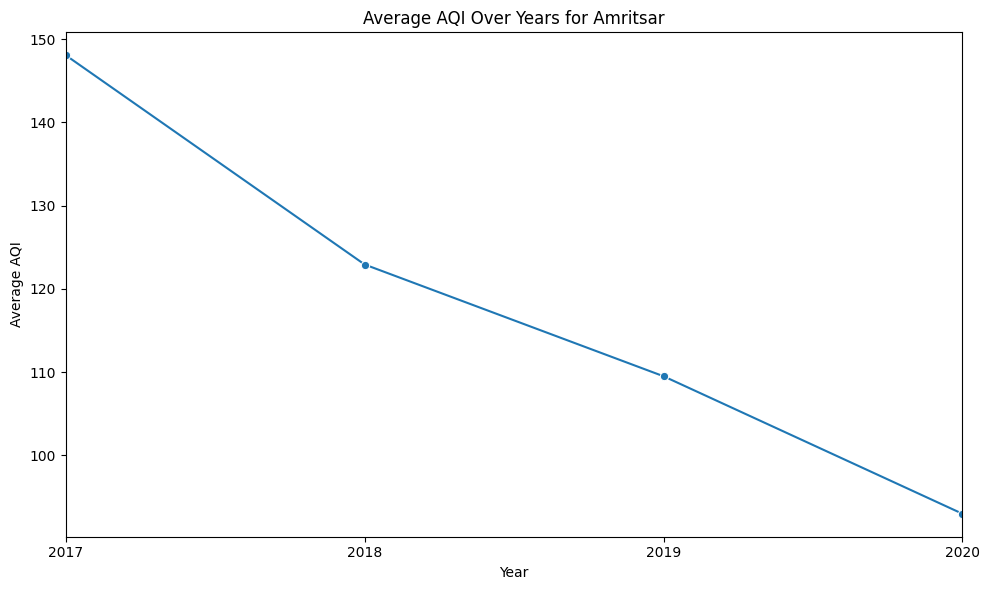

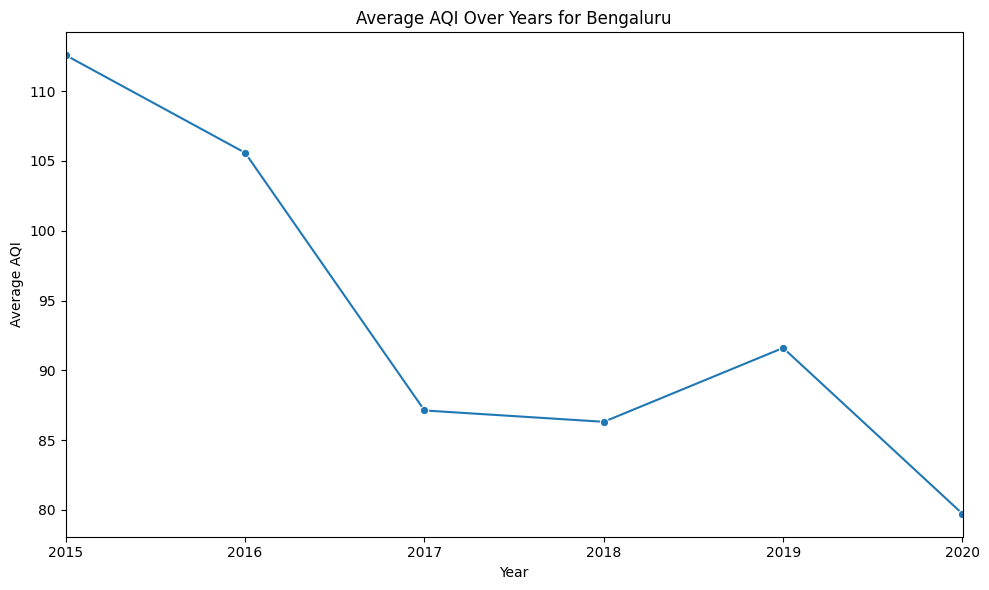

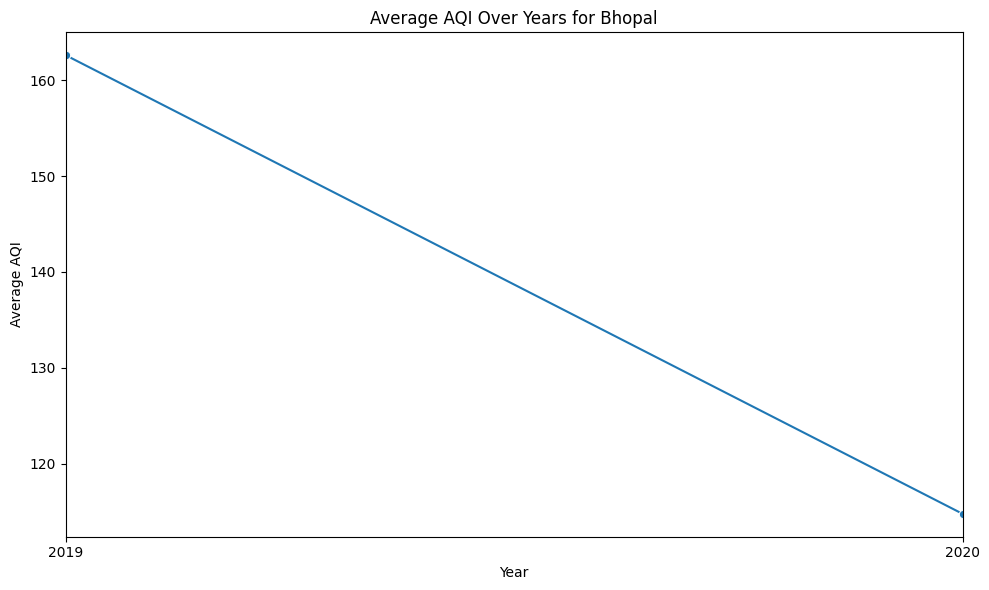

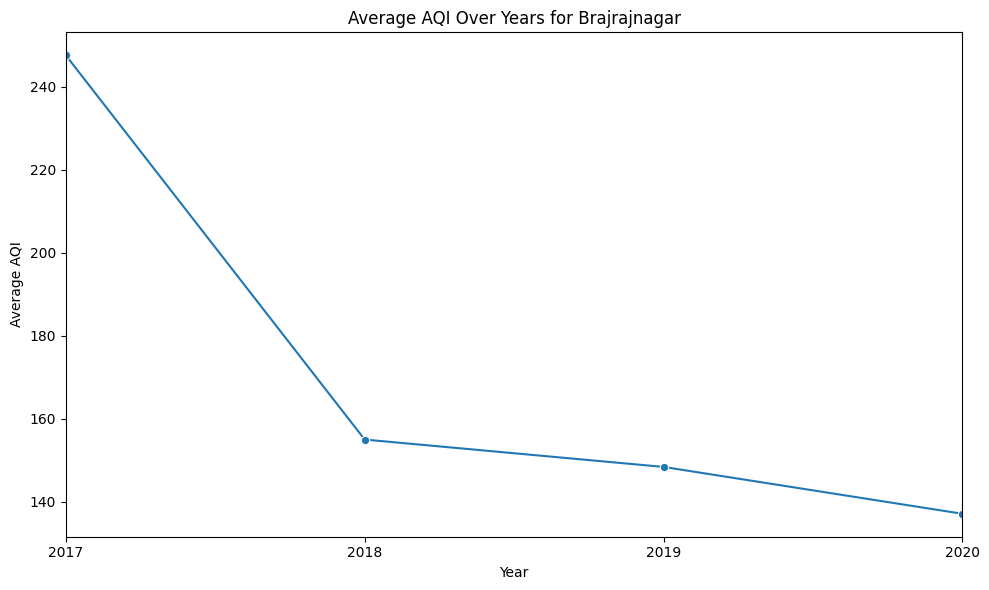

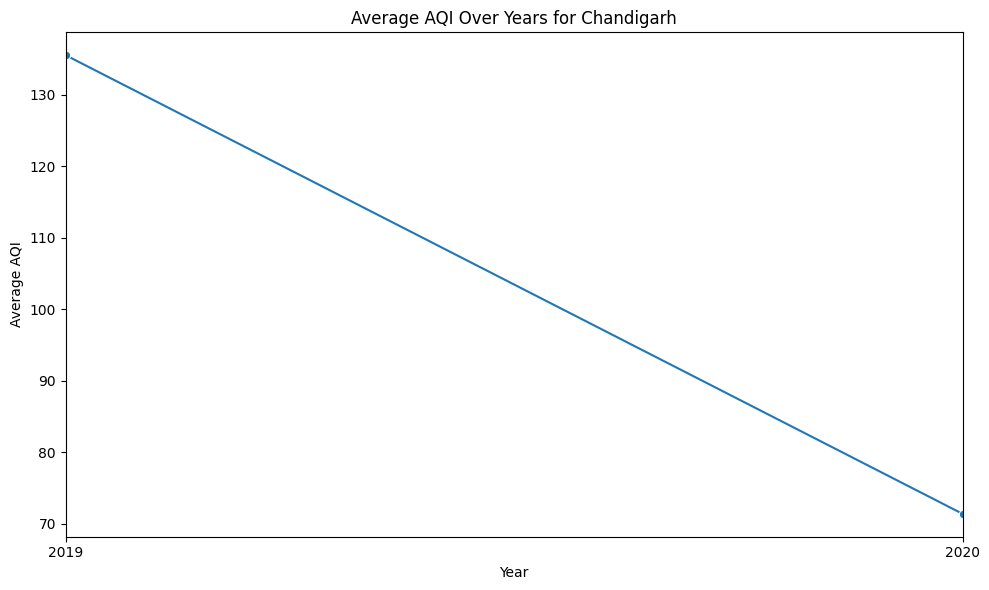

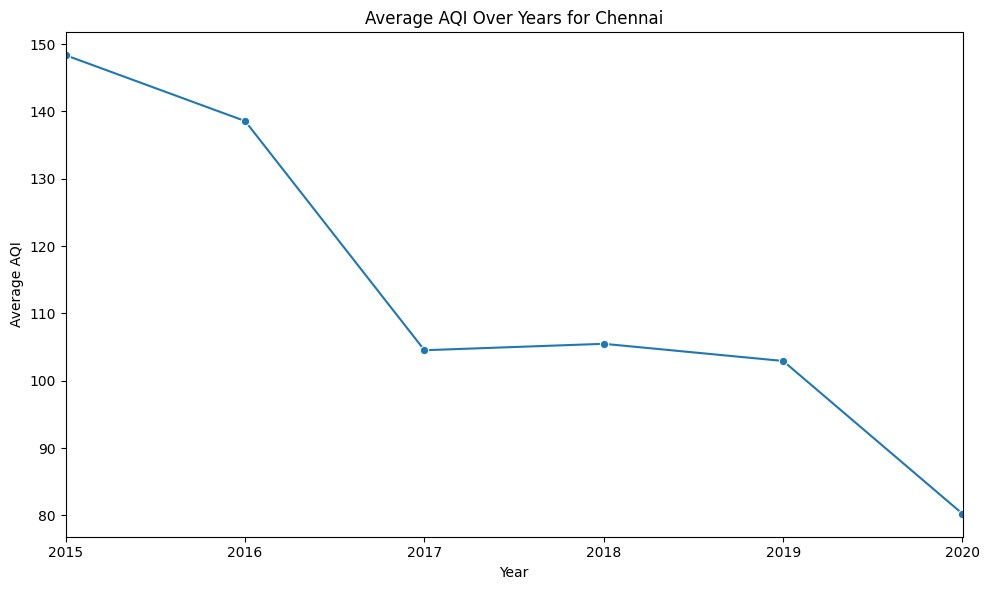

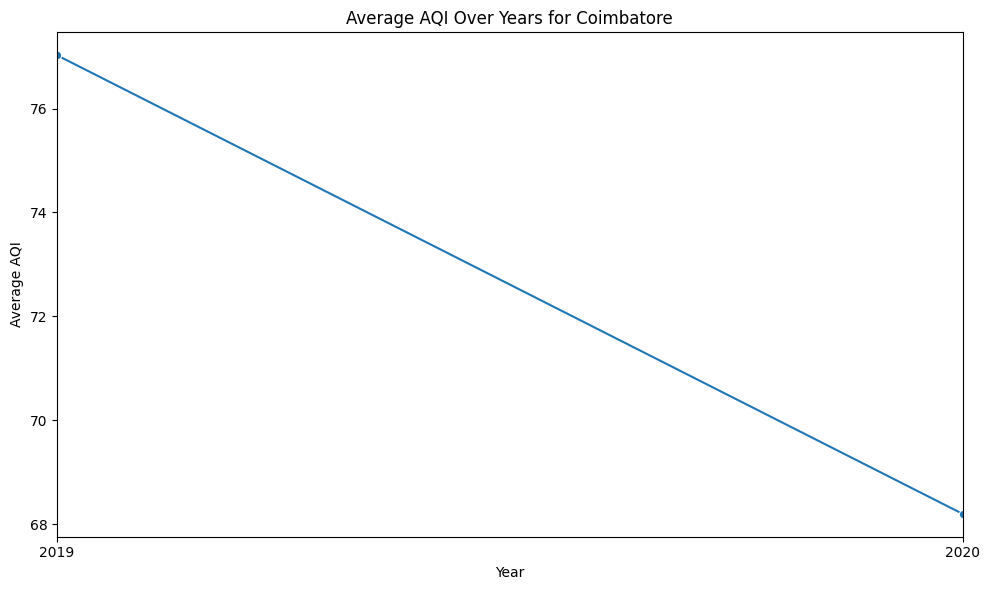

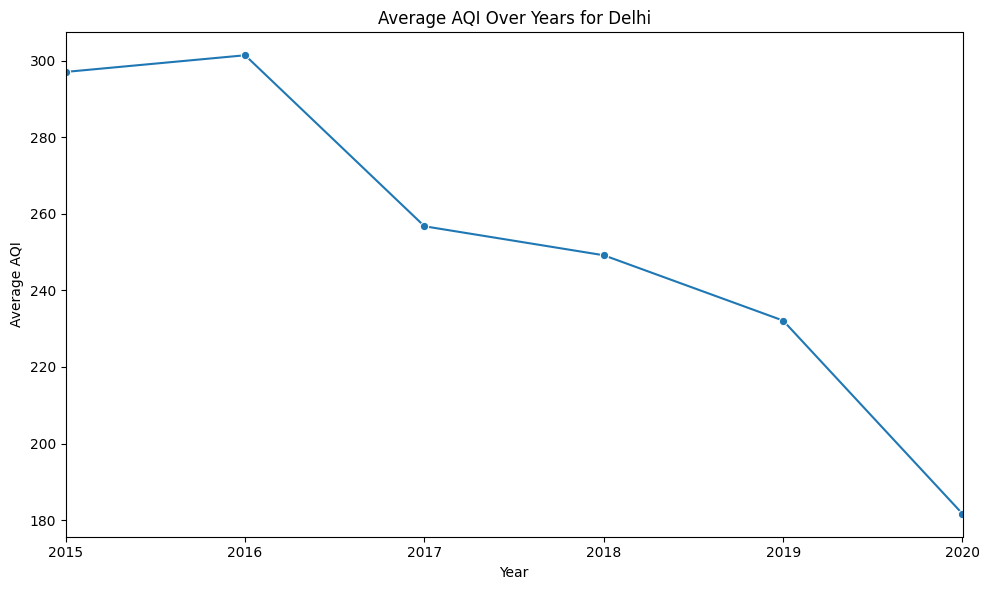

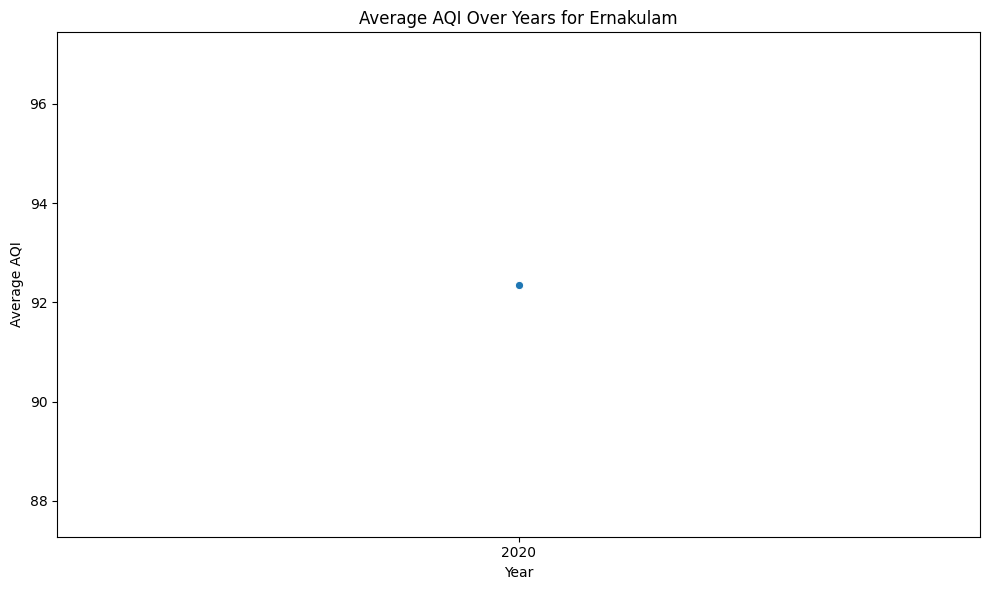

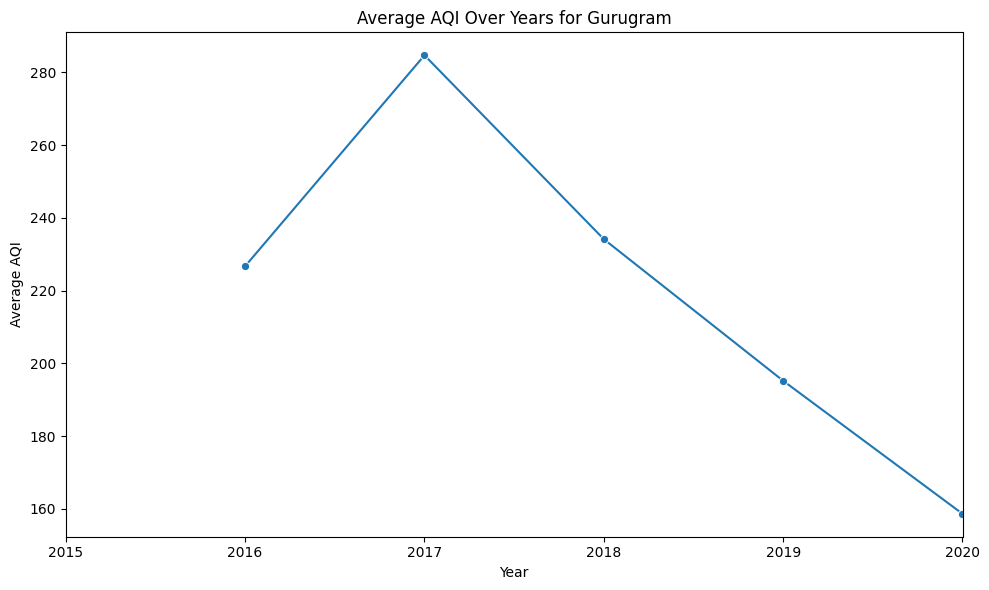

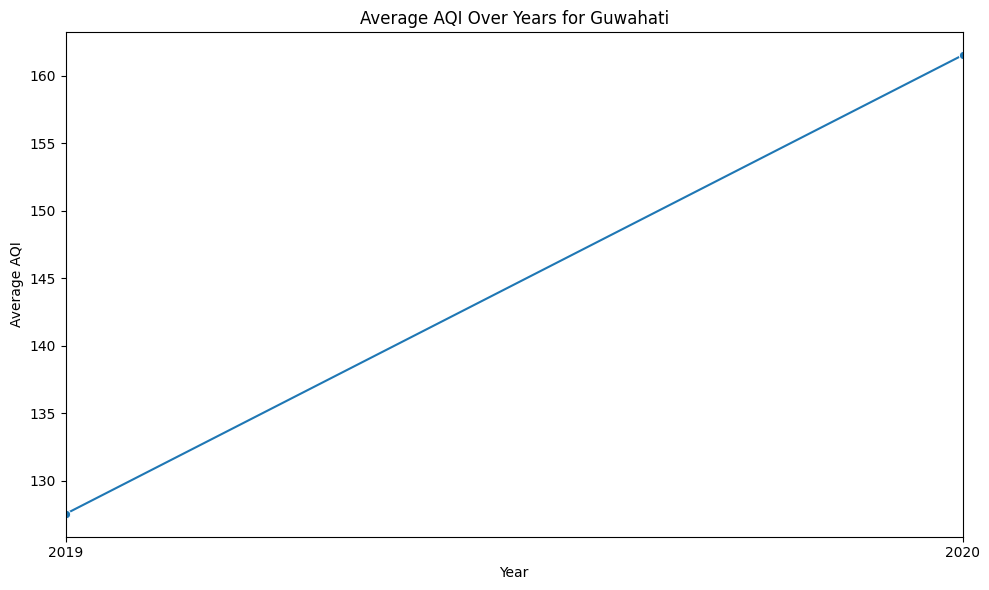

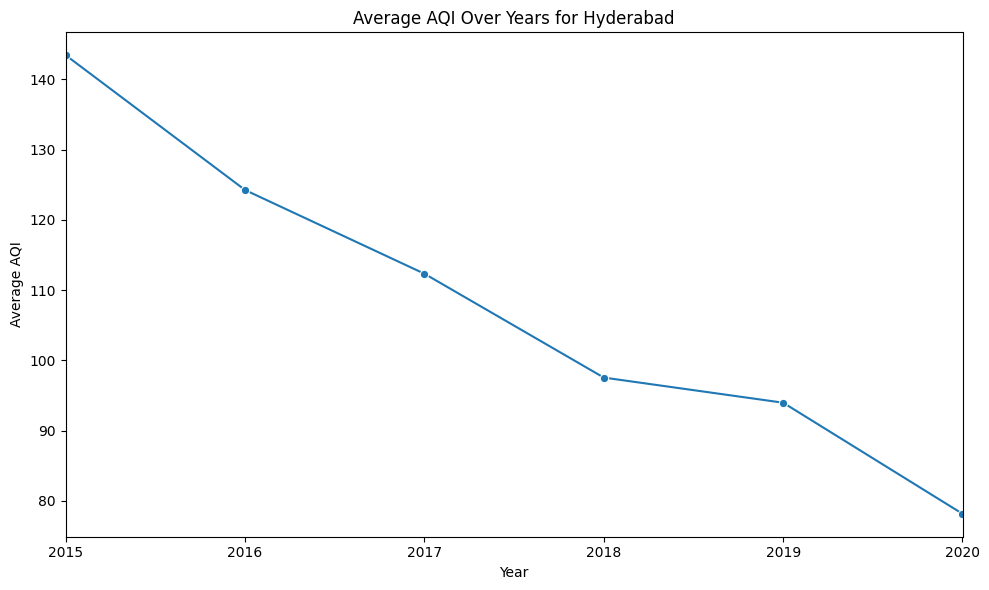

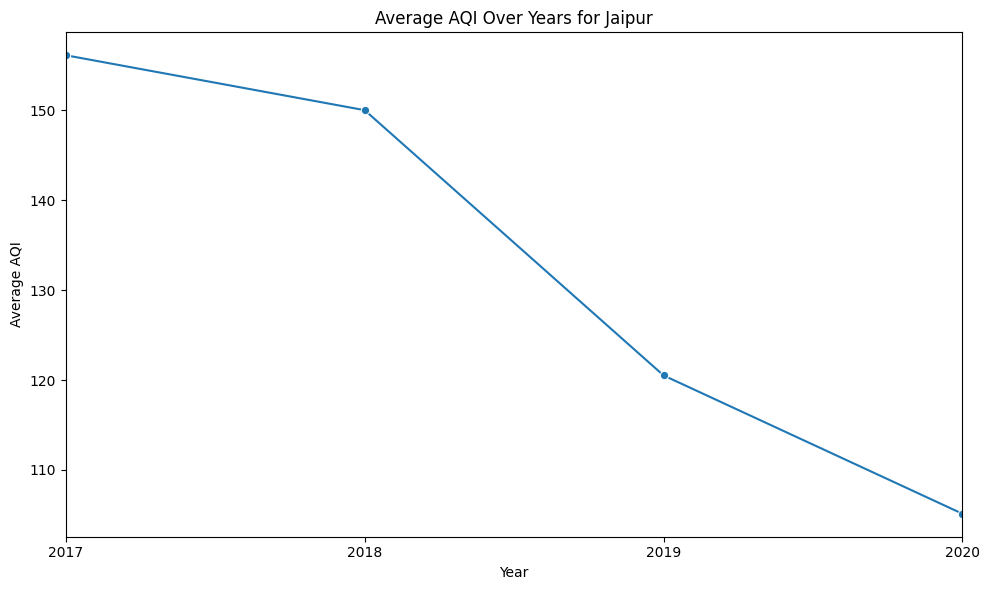

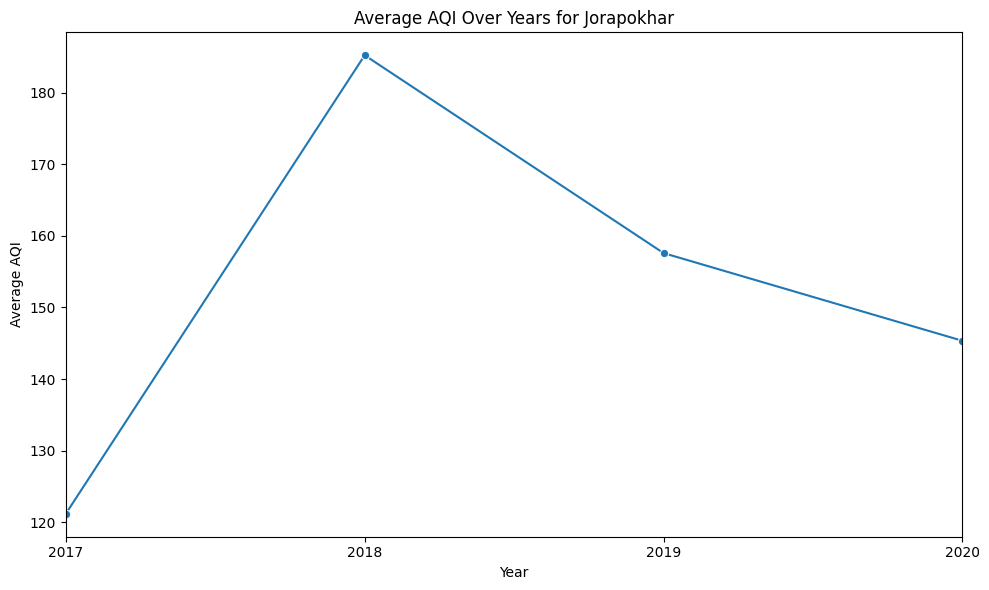

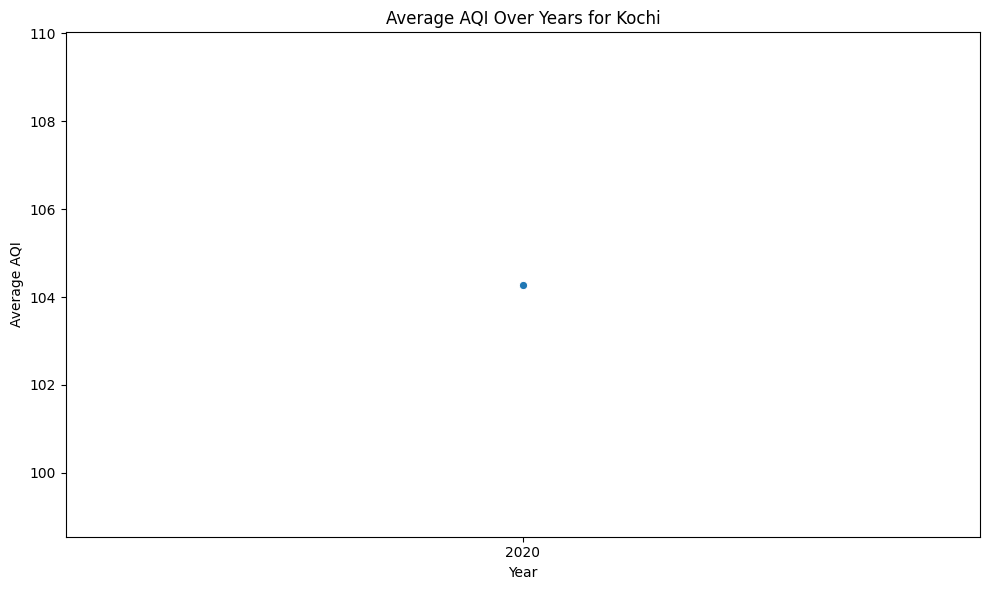

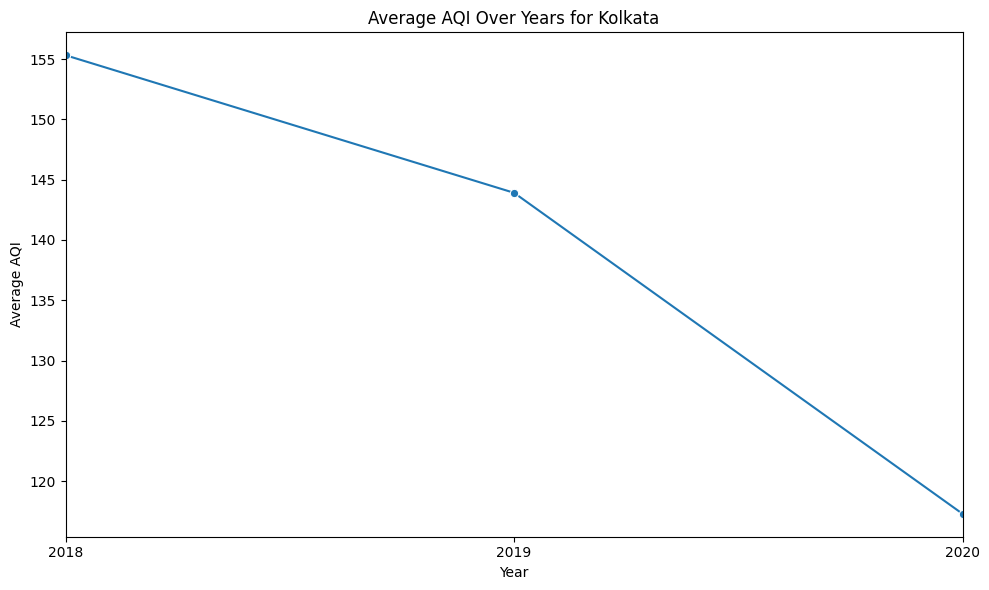

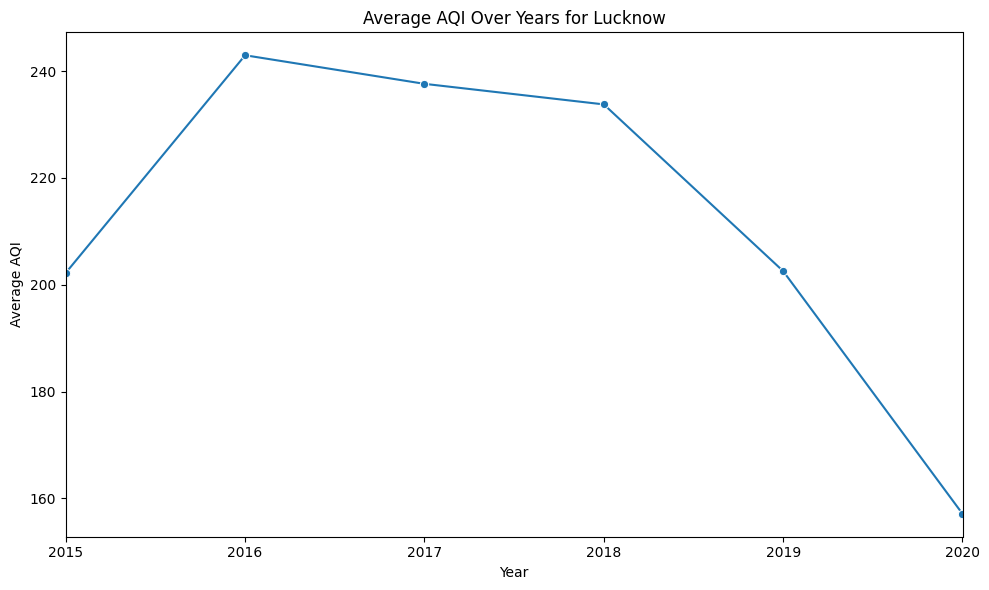

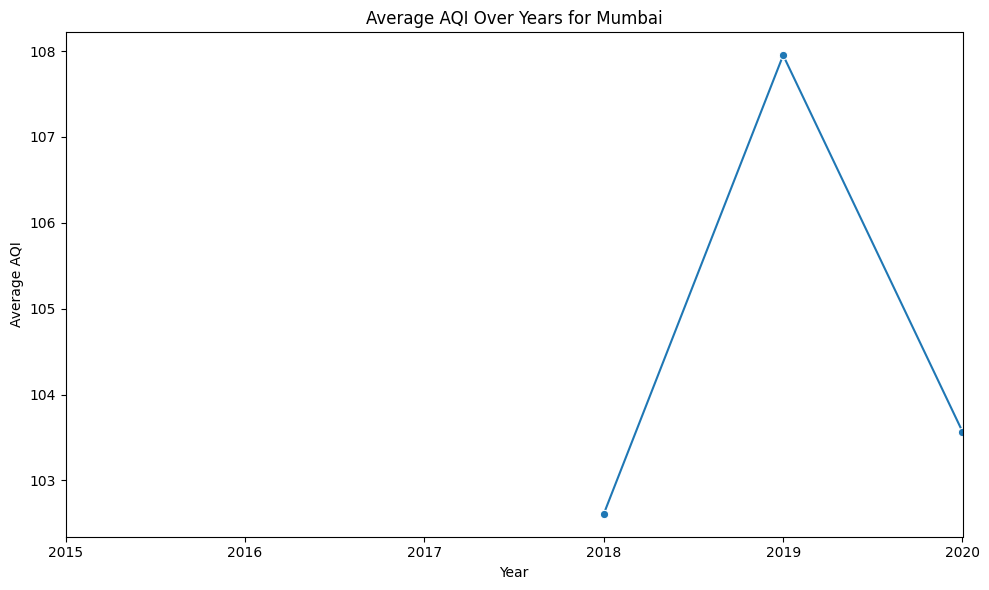

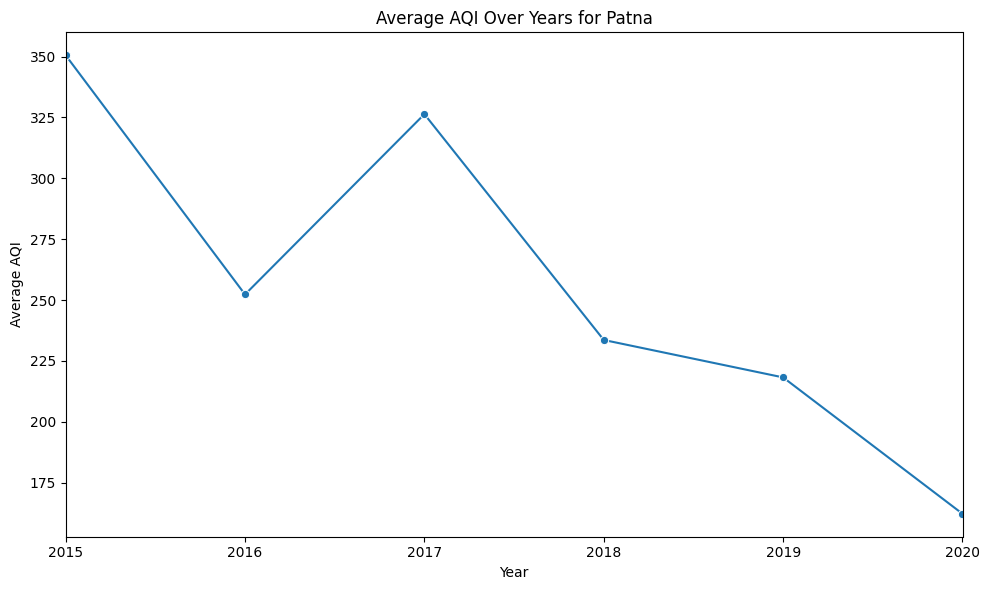

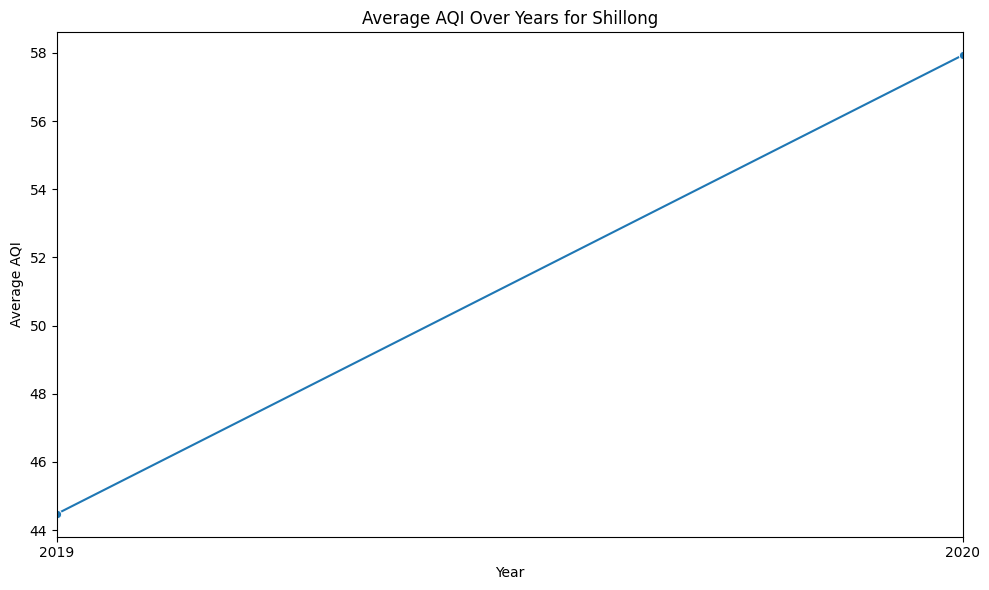

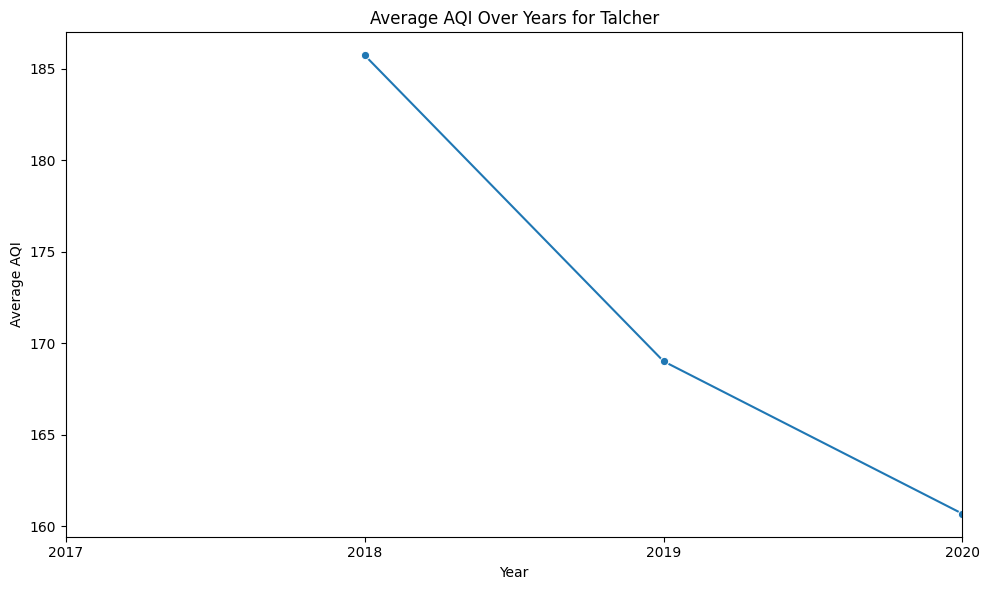

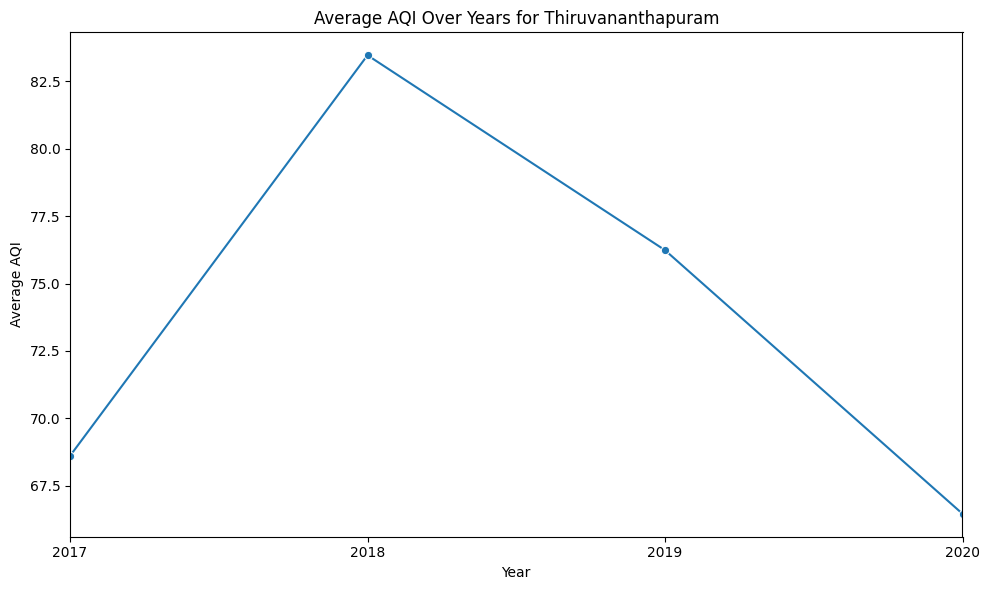

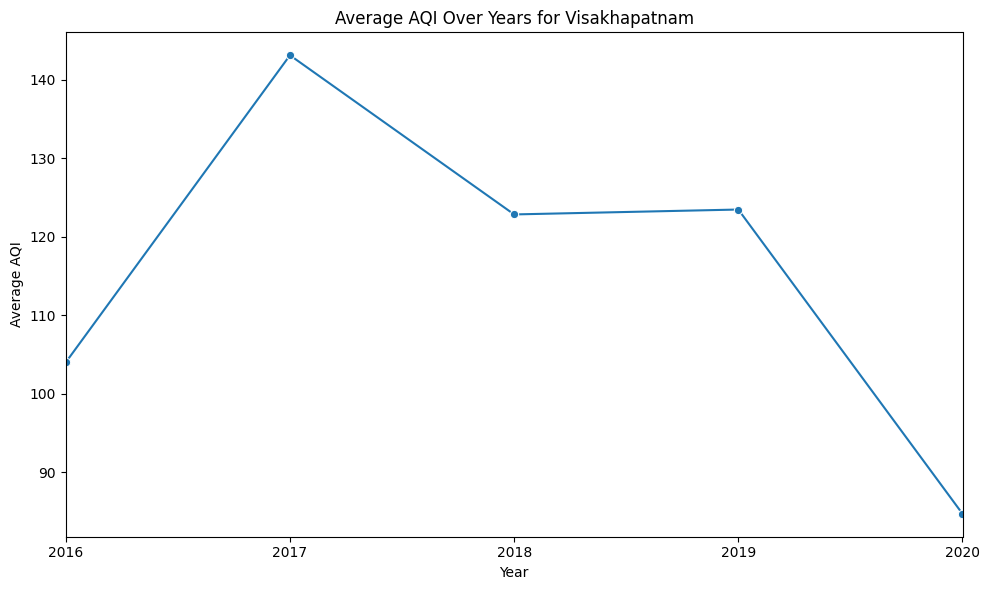

In [39]:
cities = df['City'].unique()
for city in cities:
    city_data = df[df['City'] == city]
    unique_years = city_data['year'].unique()
    if city_data['year'].isnull().all():
        print(f"No valid year data for city: {city}")
        continue

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=city_data, x='year', y='AQI', marker='o',errorbar=None)
    plt.title(f'Average AQI Over Years for {city}')
    plt.xlabel('Year')
    plt.ylabel('Average AQI')
    plt.xticks(ticks=unique_years,labels=unique_years)
    plt.xlim(min(unique_years), max(unique_years))
    plt.tight_layout()

Ahmedabad is the city with highest AQI.In most of the cities the AQI decreases in 2020 except Guwahat,Shillong.Kochi Ernakulam,Aizwal have only the AQI value of only one year.

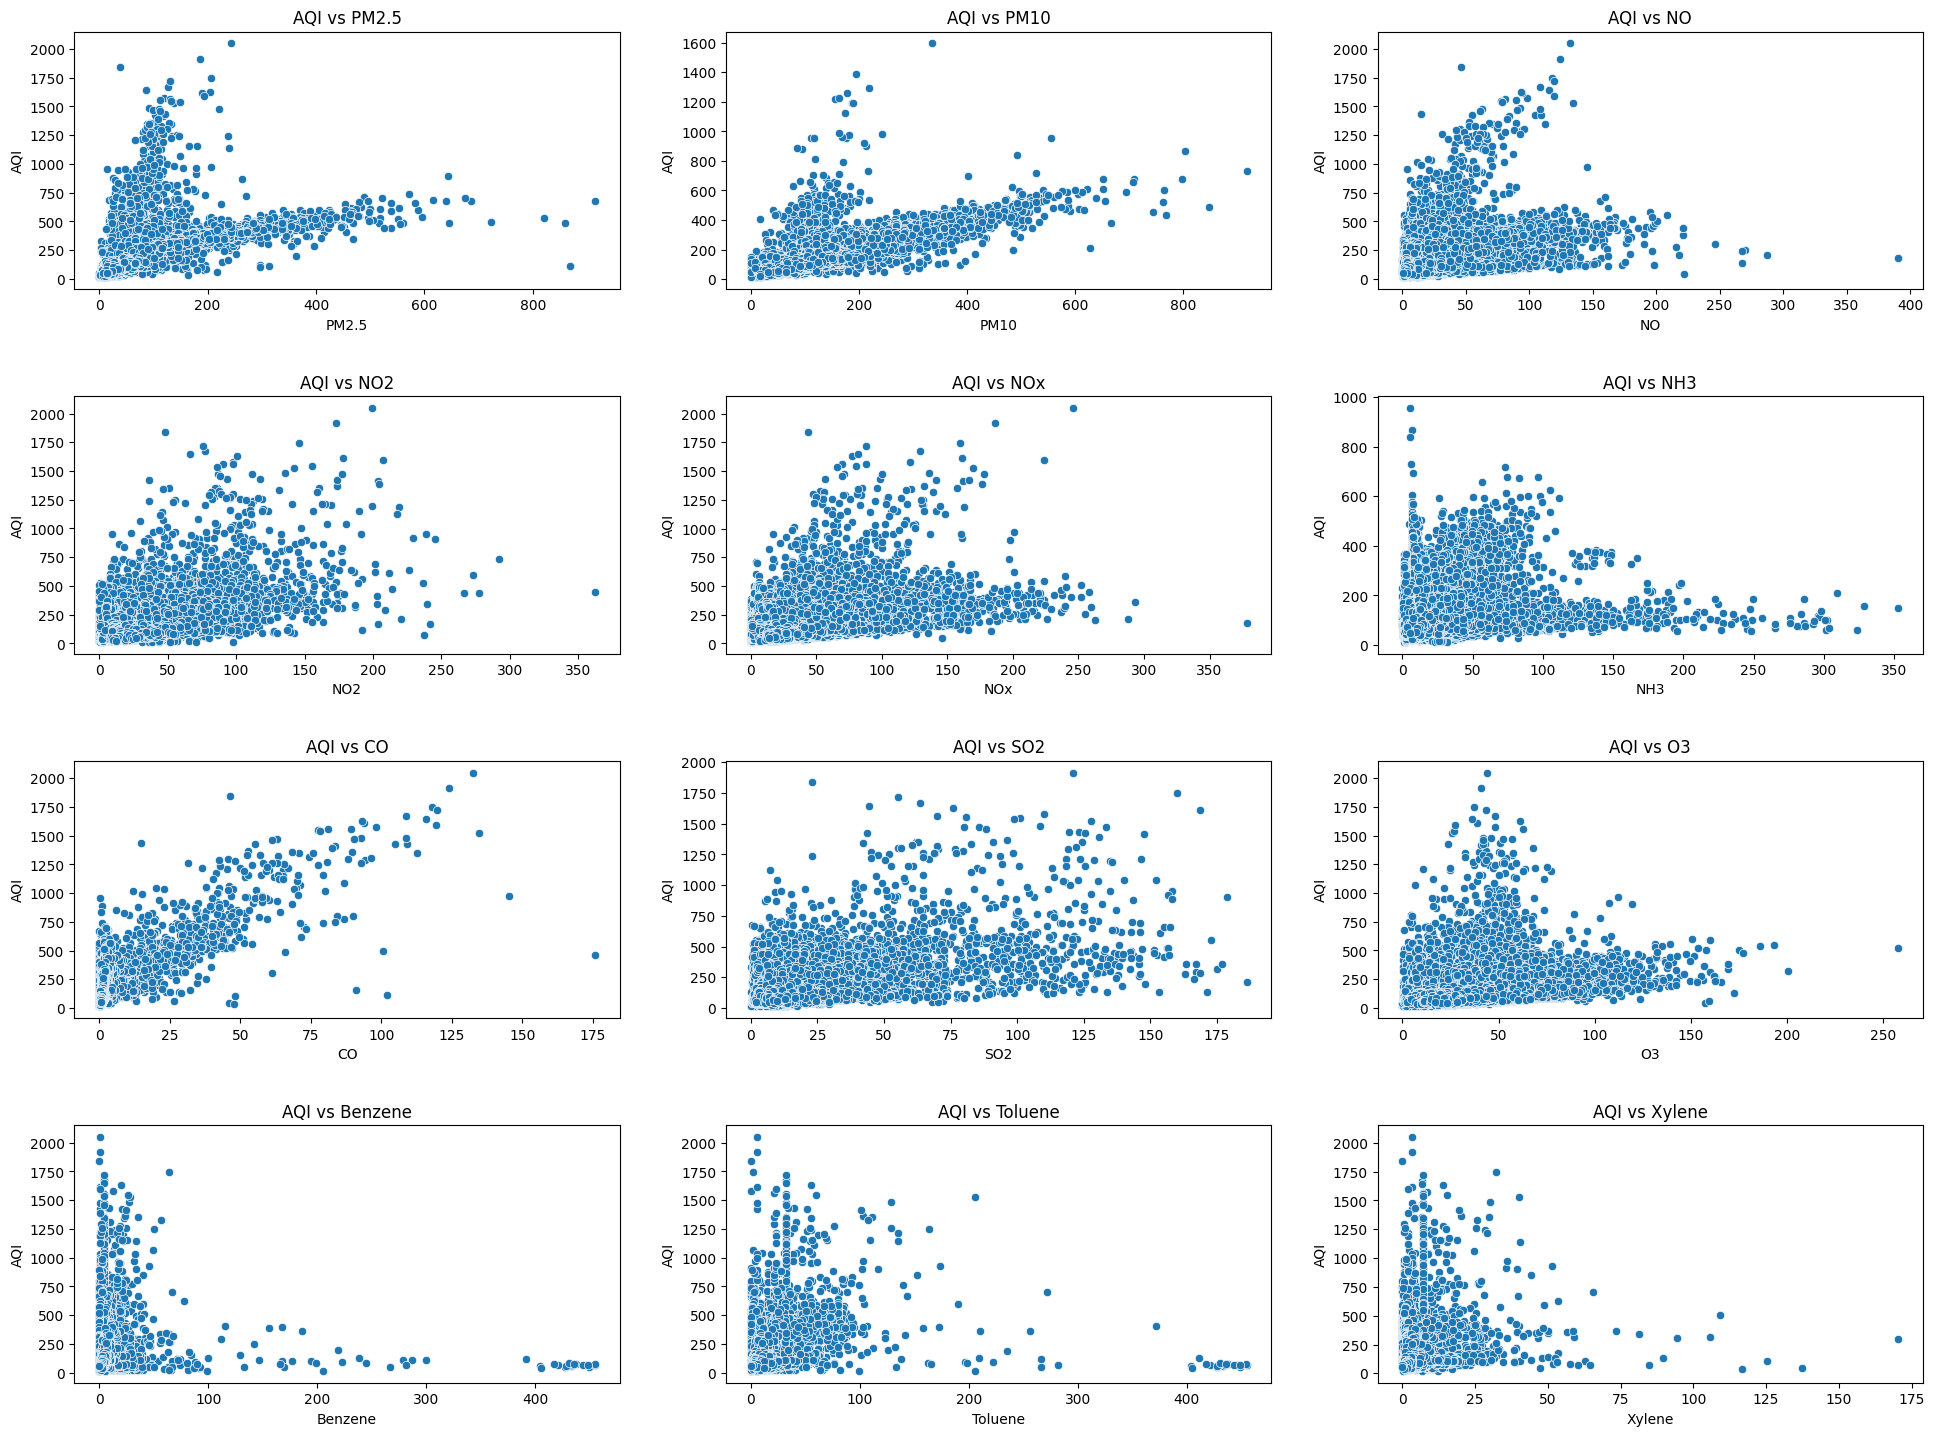

In [40]:
key_pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

plt.figure(figsize=(20, 15))
for i, pollutant in enumerate(key_pollutants, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df[pollutant], y=df['AQI'])
    plt.title(f'AQI vs {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('AQI')
plt.tight_layout(pad=3.0)  # Adjust the padding between plots
plt.show()

PM2.5 and AQI have a strong positive correlation.
NO2 and AQI have a strong positive correlation.

CO and AQI have a moderate positive correlation.
SO2 and AQI have a moderate positive correlation.
NO and AQI have a moderate positive correlation.
O3 and AQI have a moderate positive correlation.
Benzene and AQI have a moderate positive correlation.

NOx and AQI have a weak positive correlation.
NH3 and AQI have a weak positive correlation.
Toluene and AQI have a weak positive correlation.
Xylene and AQI have a weak positive correlation.

We can conclude PM2.5, NO2, CO, SO2, NO, O3, and Benzene are the most important pollutants to control in order to reduce AQI.

In [41]:
import numpy as np
num=df.select_dtypes(include=[np.number])

<Axes: >

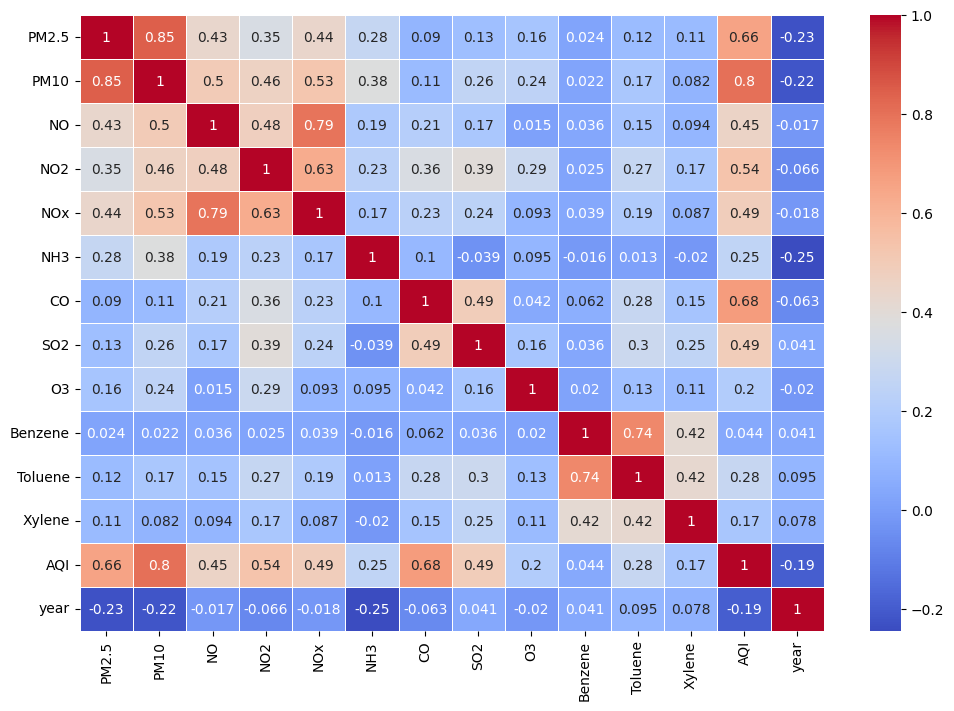

In [42]:
corr=num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

There is a strongest positive correlation between PM2.5 and PM10,NO2 and NOX,CO and SO2,NO and NOx
This suggests that there are strong relationships between certain air pollutants, and that reducing one pollutant may also help reduce others. For example, reducing PM2.5 emissions is likely to also reduce PM10 emissions.
PM10,PM2.5,NO2,CO,SO2 have high impact on AQI.

In [43]:
(df['PM2.5'].isnull().sum()/len(df))*100

15.570078900138837

In [44]:
for i in df.columns:
  missing_perc=(df[i].isnull().sum()/len(df))*100
  print(f'{i}: {missing_perc:.2f}%')

City: 0.00%
Date: 0.00%
PM2.5: 15.57%
PM10: 37.72%
NO: 12.13%
NO2: 12.14%
NOx: 14.17%
NH3: 34.97%
CO: 6.97%
SO2: 13.05%
O3: 13.62%
Benzene: 19.04%
Toluene: 27.23%
Xylene: 61.32%
AQI: 15.85%
AQI_Bucket: 15.85%
year: 0.00%
